In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def get_angles(pos, i, d_model):
    # angle_rates = 2*(i//2) * np.linspace(0,2,d_model)
    angle_rates = np.power(10000, (2 * (i//2)) / np.float32(d_model))
    # angle_rates = np.power(1,2 * (i//2)) *  ( 2 / np.float(d_model) )
    # angle_rates =  np.power(1,2 * (i)) * (1/ np.float(d_model/2) )
    return pos * angle_rates

In [20]:
def get_angles(dim):
    angle_rates = np.linspace(0,2*np.pi,dim)
    res = np.array([angle_rates for _ in range(dim)])
    return res

In [21]:
res = get_angles(4)
print(res)
print(res.shape)

[[0.         2.0943951  4.1887902  6.28318531]
 [0.         2.0943951  4.1887902  6.28318531]
 [0.         2.0943951  4.1887902  6.28318531]
 [0.         2.0943951  4.1887902  6.28318531]]
(4, 4)


In [22]:
def positional_encoding(d_model):
  angle_rates = np.linspace(0,(2*np.pi),d_model)
  angle_rads = np.array([angle_rates for _ in range(d_model)])
#   print(angle_rads)
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
#   print(angle_rads)
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2]) 

  pos_encoding = angle_rads[np.newaxis, ...]
  # return tf.cast(pos_encoding, dtype=tf.float32) 
  return pos_encoding 

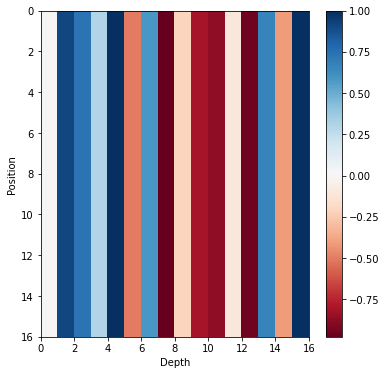

In [8]:
position = 16
dimensions = 16

pos_encoding = positional_encoding(dimensions)

plt.figure(figsize=(6,6))
plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, dimensions))
plt.ylim((position,0))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [23]:
res = np.dot(pos_encoding[0],pos_encoding[0].T)
print(res)

[[8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]]


In [24]:
def gs(input_matrix):
    Q, R = np.linalg.qr(input_matrix)
    return Q

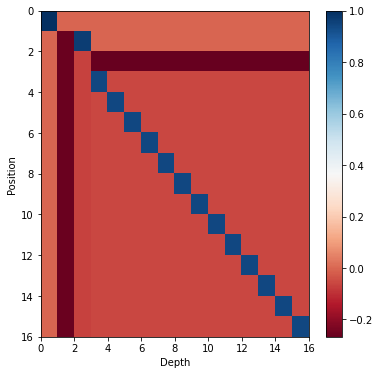

In [25]:
res = gs(pos_encoding[0])
plt.figure(figsize=(6,6))
plt.pcolormesh(res, cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, dimensions))
plt.ylim((position,0))
plt.ylabel('Position')
plt.colorbar()
plt.show()